In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex1data1.txt'
data = pd.read_csv(path,header=None,names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


# 可视化数据

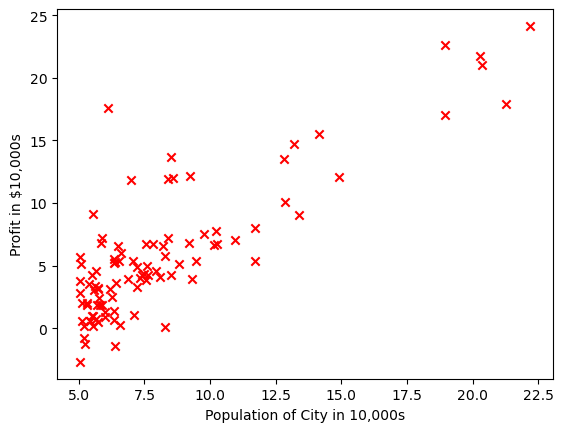

In [4]:
plt.scatter(
    data['Population'],
    data['Profit'],
    marker='x',
    facecolor='red'
)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

plt.show()


# 批量梯度下降算法

In [5]:
#代价函数
def computeCost(X,y,theta):
    inner = np.power(( X * theta.T  - y),2)
    return np.sum(inner)/(2*len(X))
    
data.insert(0,'Ones',1)
cols = data.shape[1]
X = data[['Ones','Population']]
y = data.iloc[:,cols-1:cols]



In [6]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [7]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [8]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [9]:
theta

matrix([[0, 0]])

In [10]:
X.shape,y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

In [11]:
computeCost(X,y,theta)

32.072733877455676

In [12]:
#批量梯度下降算法
def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])#展平矩阵
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) -y
        for j in range(parameters):#一次迭代，更新一次参数向量
            term = np.multiply(error,X[:,j])#对应元素相乘,求得更新公式偏导数部分的总和
            temp[0,j] = theta[0,j] -((alpha/len(X)))*np.sum(term)
        theta = temp
        cost[i] = computeCost(X,y,theta)
    return theta,cost

初始化学习率和迭代次数

In [13]:
alpha = 0.01
iters =1000

运行梯度下降算法，寻找参数θ

In [14]:
g,cost = gradientDescent(X,y,theta,alpha,iters)
g

matrix([[-3.24140214,  1.1272942 ]])

计算最后的参数的代价函数

In [15]:
computeCost(X,y,g)

4.515955503078914

绘制线性模型和数据，直观看出拟合

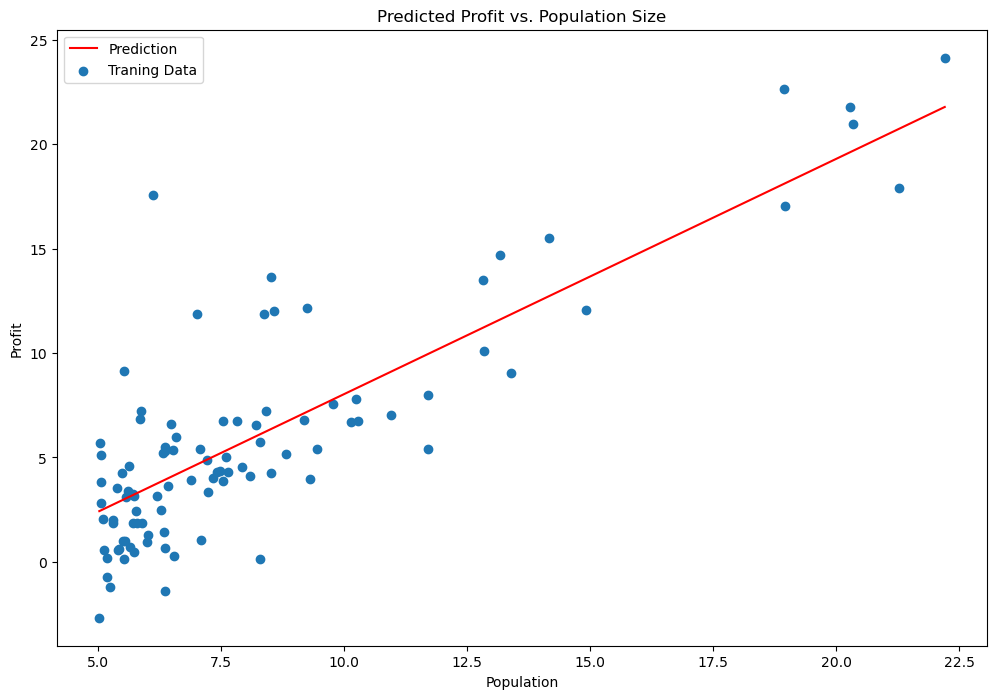

In [16]:
x = np.linspace(data.Population.min(),data.Population.max(),100)
f = g[0,0]+g[0,1]*x
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population,data.Profit,label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

每次迭代都输出一个代价值，绘制轮数和代价函数

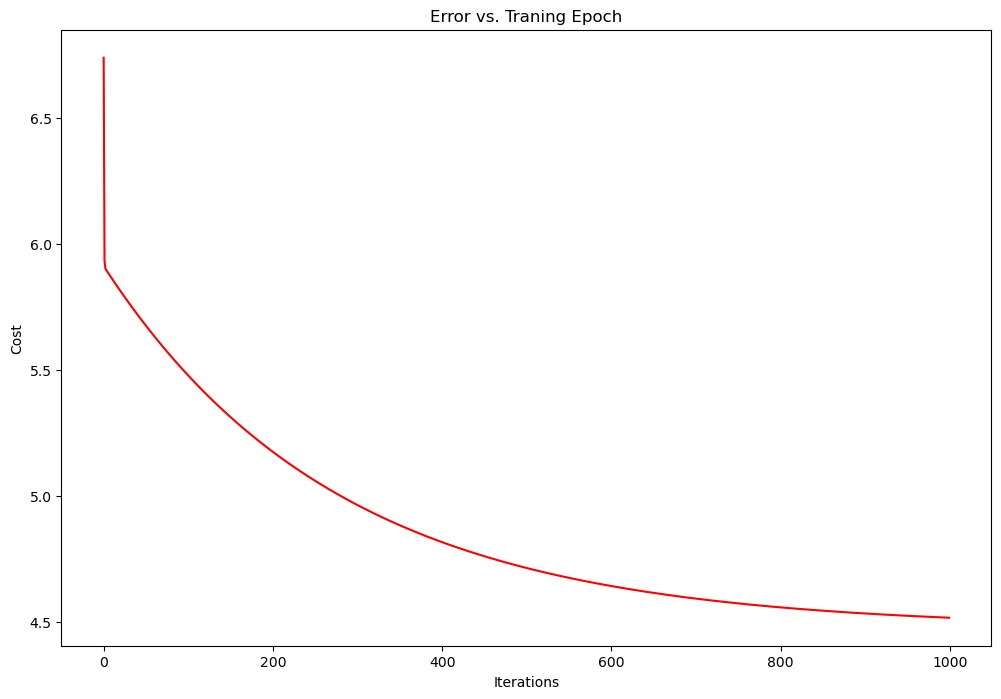

In [17]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Traning Epoch')
plt.show()

# 多变量线性回归

In [18]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path,header=None,names=['Size','Bedrooms','Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


预处理步骤-特征标准化

In [19]:
data2 = (data2 - data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


分割 X y

In [20]:
clos2 = data2.shape[1]
X2 = data2[['Size','Bedrooms']]
y2 = data2.iloc[:,clos2-1:clos2]

添加x0特征

In [21]:
X2.insert(0,'Ones',1)

把dataframe编程矩阵

In [22]:
X2=np.matrix(X2)
y2=np.matrix(y2)
theta2=np.matrix(np.array([0,0,0]))

In [23]:
X2.shape,y2.shape,theta2.shape

((47, 3), (47, 1), (1, 3))

In [24]:
theta2

matrix([[0, 0, 0]])

In [25]:
computeCost(X,y,theta)

32.072733877455676

In [26]:
g2,cost2 = gradientDescent(X2,y2,theta2,alpha,iters)
computeCost(X2,y2,g2)

0.13070336960771892

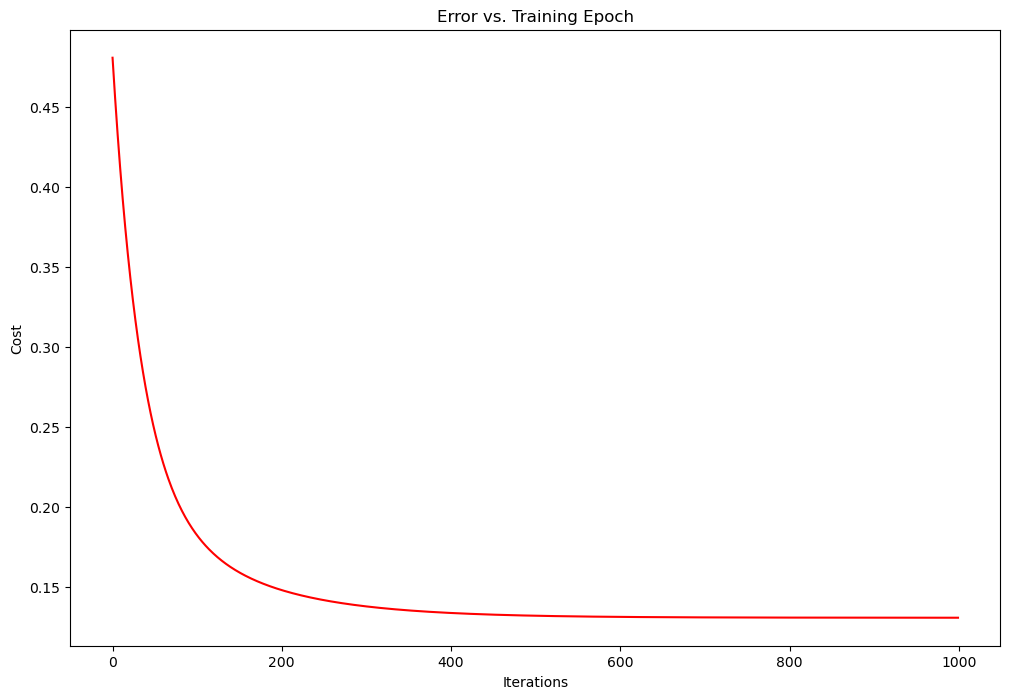

In [27]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost2,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

使用scikit-learn线性回归算法

In [28]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(np.asarray(X),np.asarray(y))

LinearRegression()

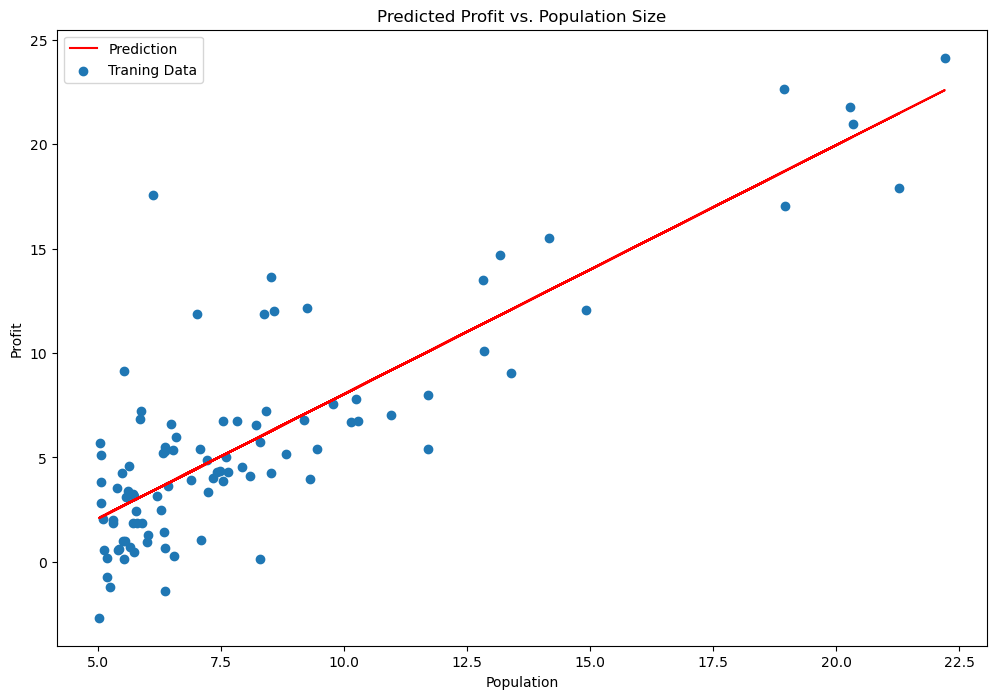

In [29]:
x= X[:,1].A1 #展平成一维数组
f = model.predict(np.asarray(X)).flatten()

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population,data.Profit,label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

# normal equation（正规方程）

In [30]:
#正规方程
def normalEqn(X,y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [31]:
final_theta1 = normalEqn(X,y)
final_theta1

matrix([[-3.89578088],
        [ 1.19303364]])

In [32]:
g #梯度下降的θ的结果

matrix([[-3.24140214,  1.1272942 ]])

In [33]:
final_theta2 = normalEqn(X2,y2)
final_theta2 = final_theta2.ravel()
final_theta2

matrix([[-1.04083409e-16,  8.84765988e-01, -5.31788197e-02]])

In [34]:
g2

matrix([[-1.03191687e-16,  8.78503652e-01, -4.69166570e-02]])

In [35]:
g2[0,0]+g2[0,1]*1650+g2[0,2]*3

1449.3902761969246

In [36]:
final_theta2[0,0]+final_theta2[0,1]*1650+final_theta2[0,2]*3

1459.7043435016808